<a href="https://colab.research.google.com/github/jr735/EC414HWFolder/blob/master/Homework9(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 9 Backpropagation and introduction to Pytorch
Due on April 21th

## Problem 1: Backprop in a simple MLP
Here, we ask you to derive all the steps of the backpropagation algorithm for a simple classification network. Consider a fully-connected neural network, also known as a multi-layer perceptron (MLP), with a single hidden layer and a one-node output layer. The hidden and output nodes use an elementwise sigmoid activation function and the loss layer uses cross-entropy loss:
<p>
$f(z)=\frac{1}{1+exp(-z))}$
<br>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p>
<p>
The computation graph for an example network is shown below. Note that it has an equal number of nodes in the input and hidden layer (3 each), but, in general, they need not be equal. Also, to make the application of backprop easier, we show the <i>computation graph</i> which shows the dot product and activation functions as their own nodes, rather than the usual graph showing a single node for both.

</p>

<img src="https://raw.githubusercontent.com/ruizhaoz/EC414/master/mlpgraph.png" style="height:200px;">

The backpropagation algorithm for an MLP is displayed below. For simplicity, we will assume no regularization on the weights, so you can ignore the terms involving $\Omega$. The forward step is: 

<img src="https://raw.githubusercontent.com/ruizhaoz/EC414/master/forward.png" style="width:200px;">

and the backward step is:

<img src="https://raw.githubusercontent.com/ruizhaoz/EC414/master/backward.png" style="width:200px;">

Write down each step of the backward pass explicitly for all layers, i.e. for the loss and $k=2,1$, compute all gradients above, expressing them as a function of variables $x, y, h, W, b$. <i>Hint: you should substitute the updated values for the gradient $g$ in each step and simplify as much as possible.</i>  Specifically, compute the following (we have replaced the superscript notation $u^{(i)}$ with $u^i$):

**Q1.1**: $\nabla_{\hat{y}}L(\hat{y},y)$

**Solution:**
$$-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}}=(\hat{y}-y)(1-y)$$


**Q1.2**: $\nabla_{a^{(2)}}J$

**Solution:**
$$(\hat{y}-y)(1-y)\frac{e^{-a^(2)}}{(e^{-a^(2)}+1)^2} $$


**Q1.3**: $\nabla_{b^{(2)}}J$

**Solution:**
$$(\hat{y}-y)(1-y)\frac{e^{-a^(2)}}{(e^{-a^(2)}+1)^2}+b^{(2)}$$


**Q1.4**: $\nabla_{W^{(2)}}J$

**Solution:**


**Q1.5**: $\nabla_{h^{(1)}}J$ 

**Solution:**
$$((\hat{y}-y)(1-y)\frac{e^{-a^(2)}}{(e^{-a^(2)}+1)^2}+b^{(2)})*h^{k-1}+W^{(2)}$$


**Q1.6**: $\nabla_{b^{(1)}}J$, $\nabla_{W^{(1)}}J$

**Solution:**
$$((\hat{y}-y)(1-y)\frac{e^{-a^(2)}}{(e^{-a^(2)}+1)^2}+b^{(2)})*h^{k-1}+W^{(2)}+b^{(1)}+W^{(1)}$$


**Q1.7** Briefly, explain how would the computational speed of backpropagation be affected if it did not save results in the forward pass?

**Solution:**
It would take way longer because then every result in the forward pass would be recomputed before each gradient calculated in the backwards pass.

# Problem 2: Pytorch Intro
## **Q2.0**: Pytorch tutorials
This homework will introduce you to [PyTorch](https://pytorch.org), currently the fastest growing deep learning library, and the one we will use in this course.

Before starting the homework, please go over these introductory tutorials on the PyTorch webpage:

*   [60-minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

In [36]:
import torch
import numpy as np

The `torch.Tensor` class is the basic building block in PyTorch and is used to hold data and parameters. The `autograd` package provides automatic differentiation for all operations on Tensors. After reading about Autograd in the tutorials above,  we will implement a few simple examples of what Autograd can do.

## **Q2.1**. Simple function
 Use `autograd` to do backpropagation on the simple function, $f=(x+y)*z$. 

**Q2.1.1** Create the three input tensors with values $x=-2$, $y=5$ and $z=-4$ as tensors and set `requires_grad=True` to track computation on them.



In [37]:
# solution here
x = np.array([-2.])
x=torch.from_numpy(x)
x.requires_grad_(True)
y = np.array([5.])
y=torch.from_numpy(y)
y.requires_grad_(True)
z = np.array([-4.])
z=torch.from_numpy(z)
z.requires_grad_(True)
print(x, y, z)

tensor([-2.], dtype=torch.float64, requires_grad=True) tensor([5.], dtype=torch.float64, requires_grad=True) tensor([-4.], dtype=torch.float64, requires_grad=True)


**Q2.1.2** Compute the $q=x+y$ and $f=q \times z$ functions, creating tensors for them in the process. Print out $q,f$, then run `f.backward(retain_graph=True)`, to compute the gradients w.r.t. $x,y,z$. The `retain_graph` attribute tells autograd to keep the computation graph around after backward pass as opposed deleting it (freeing some memory). Print the gradients. Note that the gradient for $q$ will be `None` since it is an intermediate node, even though `requires_grad` for it is automatically set to `True`. To access gradients for intermediate nodes in PyTorch you can use hooks as mentioned in [this answer](https://discuss.pytorch.org/t/why-cant-i-see-grad-of-an-intermediate-variable/94/2). Compute the values by hand (or check the slides) to verify your solution.

In [38]:
# solution here
q = torch.add(x,y)
f = torch.mul(q,z)
print(q, f)
# compute the gradient
f.backward(retain_graph=True)
print(x.grad, y.grad, z.grad, q.grad, f.grad)

tensor([3.], dtype=torch.float64, grad_fn=<AddBackward0>) tensor([-12.], dtype=torch.float64, grad_fn=<MulBackward0>)
tensor([-4.], dtype=torch.float64) tensor([-4.], dtype=torch.float64) tensor([3.], dtype=torch.float64) None None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  import sys


**Q2.1.3** If we now run `backward()` again, it will add the gradients to their previous values. Try it by running the above cell multiple times. This is useful in some cases, but if we just wanted to re-compute the gradients again, we need to zero them first, then run `backward()`. Add this step, then try running the  backward function multiple times to make sure the answer is the same each time!

In [39]:
# solution here
# zero the gradient
x.grad.zero_()
y.grad.zero_()
z.grad.zero_()


print(x.grad, y.grad, z.grad, q.grad, f.grad)
# compute the gradient again
f.backward(retain_graph=True)
print(x.grad, y.grad, z.grad, q.grad, f.grad)

tensor([0.], dtype=torch.float64) tensor([0.], dtype=torch.float64) tensor([0.], dtype=torch.float64) None None
tensor([-4.], dtype=torch.float64) tensor([-4.], dtype=torch.float64) tensor([3.], dtype=torch.float64) None None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  # This is added back by InteractiveShellAp

## **Q2.2** Neuron 
### 2.2.1 
Implement the function corresponding to one neuron (logistic regression unit) that we saw in the lecture and compute the gradient w.r.t. $x$ and $w$. The function is $f=\sigma(w^Tx)$ where $\sigma()$ is the sigmoid function. Initialize $x=[-1, -2, 1]$ and the weights to $w=[2, -3, -3]$ where $w_3$ is the bias. Print out the gradients.

In [40]:
# solution here
import math
x = torch.tensor([-1.,-2.,1.],requires_grad=True)
w = torch.tensor([2.,-3.,-3.],requires_grad=True)
arg=w.T@x
f = torch.sigmoid(arg)

print("\nx=", x, "\nw=", w, "\nf(x,w)=", f)
# compute the gradient calling backward()
f.backward(retain_graph=True)
print("The gradient of f() w.r.t. x is", x.grad)
print("The gradient of f() w.r.t. w is", w.grad)


x= tensor([-1., -2.,  1.], requires_grad=True) 
w= tensor([ 2., -3., -3.], requires_grad=True) 
f(x,w)= tensor(0.7311, grad_fn=<SigmoidBackward>)
The gradient of f() w.r.t. x is tensor([ 0.3932, -0.5898, -0.5898])
The gradient of f() w.r.t. w is tensor([-0.1966, -0.3932,  0.1966])


### 2.2.2 
Derive the gradient $\nabla_x f$ and  $\nabla_\omega f$ by hand to verify your results in 2.2.1. (Write out necessary steps i.e. chain rule, final computation results)

**Solution**:
$$w^Tx=1$$
$$\frac{df}{dw}=\frac{df}{d\sigma}*\frac{d\sigma}{dw}= \sigma(w^Tx)(1-\sigma(w^Tx))\frac{we^{-w^Tx}}{(e^{-w^Tx}+1)^2}=\sigma(1)(1-\sigma(1))\frac{we^{-1}}{(e^{-1}+1)^2}=0.1966w*0.731*0.269=0.03866w=[0.077,-0.116,-0.116] $$
$$\frac{df}{dx}=\frac{df}{d\sigma}*\frac{d\sigma}{dx}=\sigma(w^Tx)(1-\sigma(w^Tx))\frac{xe^{-w^Tx}}{(e^{-w^Tx}+1)^2}=\sigma(1)(1-\sigma(1))\frac{xe^{-1}}{(e^{-1}+1)^2}=0.1966x*0.731*0.269=0.03866x=[-0.03866,-0.0773,0.03866]  $$

## **Q2.3**. torch.nn

 Implement the function corresponding to one neuron (logistic regression unit) that we saw in the lecture and compute the gradient w.r.t. $x$ and $w$. The function is $f=\sigma(w^Tx+b)$ where $\sigma()$ is the sigmoid function. Initialize $x=[-1, -2]$ and the weights to $w=[2, -3]$ bias $b=-3$. Now we are using but using the `Linear` class from `torch.nn`, followed by the [Sigmoid](https://pytorch.org/docs/stable/nn.html#torch.nn.Sigmoid) class. 

In general, many useful functions are already implemented for us in this package. Compute the gradients $\partial f/\partial w$ by running `backward()` and print them out (they will be stored in the Linear variable, e.g. in `.weight.grad`.) 

In [41]:
# solution here
import torch.nn as nn
# initilize a linear layer
linear_f = torch.nn.Linear(2,1)
# initilize weight and bias
linear_f.weight.data = torch.tensor([[2.,-3.]]);
linear_f.bias.data = torch.tensor([[-3.]]);

print("\nweights:", linear_f.weight)
print("\nbias:",linear_f.bias)
print("\n:",linear_f)

m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

# initilize x and compute f
x=torch.tensor([[-1.,2.]])
lin_output=linear_f(x)
print(lin_output)
sigmoid_f=nn.Sigmoid()
f = sigmoid_f(lin_output)
print("\nf:", f)

# do backprop
f.backward(retain_graph=True)

print("The gradient of f() w.r.t. w is", linear_f.weight.grad, linear_f.bias.grad)


weights: Parameter containing:
tensor([[ 2., -3.]], requires_grad=True)

bias: Parameter containing:
tensor([[-3.]], requires_grad=True)

: Linear(in_features=2, out_features=1, bias=True)
torch.Size([128, 30])
tensor([[-11.]], grad_fn=<AddmmBackward>)

f: tensor([[1.6701e-05]], grad_fn=<SigmoidBackward>)
The gradient of f() w.r.t. w is tensor([[-1.6701e-05,  3.3402e-05]]) tensor([[1.6701e-05]])


## **Q2.4** Module
 Now lets put these two functions (Linear and Sigmoid) together into a "module". Read the [Neural Networks tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) if you have not already.

**Q2.4.1** Make a subclass of the `Module` class, called `Neuron`. Set variables to the same values as above. You will need to fill out the `__init__` and the `forward` is already given.

In [42]:
# solution here
import torch.nn as nn

class Neuron(nn.Module):

    def __init__(self):
        super(Neuron, self).__init__()
        # an affine operation: y = weight*x + bias, with fixed parameters
        self.linear = nn.Linear(2,1)
        self.linear.weight.data = torch.tensor([[2.,-3.]])
        self.linear.bias.data = torch.tensor([[-3.]])
        # a sigmoid function
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x


**Q2.4.2** Now create a  variable of your `Neuron` class called `my_neuron` and run backpropagation on it. Print out the gradients again. Make sure you zero out the gradients first, by calling `.zero_grad()` function of the parent class. Even if you will not re-compute the backprop, it is good practice to do this every time to avoid accumulating gradient!

In [43]:
# solution here
my_neuron = Neuron()
print(my_neuron)
params = list(my_neuron.parameters())

print("The weights are:", params[0])  # linear layer's .weight
# initialize the input x same as in Q2.3 and compute the output of my_neuron
x=torch.tensor([[-1.,2.]])
out = my_neuron(x)
print("\nf(x,w)=", out)
# zero the gradient of my_neuron and compute the gradient by calling backward.
my_neuron.zero_grad()
out.backward(retain_graph=True)
print("The gradient of f() w.r.t. w is", params[0].grad, params[1].grad)

Neuron(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
The weights are: Parameter containing:
tensor([[ 2., -3.]], requires_grad=True)

f(x,w)= tensor([[1.6701e-05]], grad_fn=<SigmoidBackward>)
The gradient of f() w.r.t. w is tensor([[-1.6701e-05,  3.3402e-05]]) tensor([[1.6701e-05]])


## **Q2.5**. Loss and SGD
 Now, lets train our neuron on some data. The code below creates a toy dataset containing a few inputs $x$ and outputs $y$ (a binary 0/1 label), as well as a function that plots the data and current solution.

w0 = 2.0 w1 = -3.0 bias = -3.0


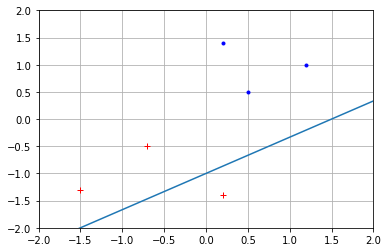

In [44]:
import matplotlib.pyplot as plt

# create some toy 2-D datapoints with binary (0/1) labels
x = torch.tensor([[1.2, 1], [0.2, 1.4], [0.5, 0.5], 
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5]])
y = torch.tensor([0, 0, 0, 1, 1, 1 ])

def plot_soln(x, y, params):
  plt.plot(x[y==1,0], x[y==1,1], 'r+')
  plt.plot(x[y==0,0], x[y==0,1], 'b.')
  plt.grid(True)
  plt.axis([-2, 2, -2, 2])
  
  # NOTE : This may depend on how you implement Neuron.
  #   Change accordingly
  w0 = params[0][0][0].item()
  w1 = params[0][0][1].item()
  bias = params[1][0].item()
  
  print("w0 =", w0, "w1 =", w1, "bias =", bias)
  dbx = torch.tensor([-2, 2])
  dby = -(1/w1)*(w0*dbx + bias)  # plot the line corresponding to the weights and bias
  plt.plot(dbx, dby)

params = list(my_neuron.parameters())
plot_soln(x, y, params)

**Q2.5.1** Declare an object `criterion` of type `nn.CrossEntropyLoss`. Note that this can be called as a function on two tensors, one representing the network outputs and the other, the targets that the network is being trained to predict, to return the loss. 

In [48]:
# solution here
criterion = nn.CrossEntropyLoss()

# forward + backward + optimize
outputs = my_neuron(x)
loss = (x,y)
print("loss =", loss)

loss = (tensor([[ 1.2000,  1.0000],
        [ 0.2000,  1.4000],
        [ 0.5000,  0.5000],
        [-1.5000, -1.3000],
        [ 0.2000, -1.4000],
        [-0.7000, -0.5000]]), tensor([0, 0, 0, 1, 1, 1]))


**Q2.5.2** Print out the chain of `grad_fn` functions backwards starting from `loss.grad_fn`  to demonstrate what backpropagation will be run on. This part is already given to you.

In [49]:
print(loss.grad_fn)  
print(loss.grad_fn.next_functions[0][0])  
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])  

AttributeError: ignored

**Q2.5.3** Run the Stochastic Gradient Descent (SGD) optimizer from the `torch.optim` package to train your classifier on the toy dataset. Use the entire dataset in each batch. Use a learning rate of $0.01$ (no other hyperparameters). You will need to write a training loop that uses the `.step()` function of the optimizer. Plot the solution and print the loss after 10000 iterations.

loss = 0.3273821473121643
w0 = 4.141496658325195 w1 = 2.4262382984161377 bias = -0.8129551410675049


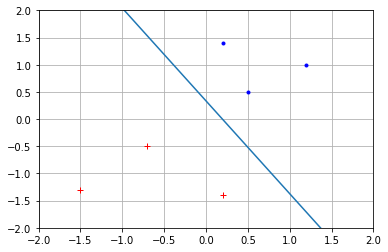

In [ ]:
# solution here
import torch.optim as optim

# create your optimizer
optimizer = None

# training loop
for i in range(10000):
  # in your training loop:
  # 1. zero the gradient buffers
  # 2. compute the output by given the input x
  # 3. compute the loss
  # 4. computing the gradient 
  # 5. update the parameter by calling step on the optimizer


print("loss =", loss.item())
params = list(my_neuron.parameters())
plot_soln(x, y, params)